In [8]:
import time
from math import *
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

In [9]:
data = np.loadtxt('ACH.dat')

In [10]:
Lbox = 1100
hLbox = Lbox/2

Nt = 110000
nbar = Nt / Lbox**3

nk = 5
fbasis = np.zeros(nk+1)

nr = 21
rmin = 60
rmax = 120
rmid = (rmax+rmin)/2
mu = rmid
scale = 4.6

In [11]:
sample = np.random.choice(len(data),size=Nt,replace=False)

In [12]:
x, y, z = data[sample].T

In [13]:
t0 = time.time()

Nb = np.zeros(nr)

for i in range(0,Nt-1):
    j = np.arange(i+1,Nt)
    
    dx = x[i] - x[j]
    dy = y[i] - y[j]
    dz = z[i] - z[j]
        
    ### periodic boundary conditions on separations: 
    dxp = dx + Lbox
    dyp = dy + Lbox
    dzp = dz + Lbox
    dxm = dx - Lbox
    dym = dy - Lbox
    dzm = dz - Lbox
    dx[np.where(dx > hLbox)] = dxm[np.where(dx > hLbox)]
    dy[np.where(dy > hLbox)] = dym[np.where(dy > hLbox)]
    dz[np.where(dz > hLbox)] = dzm[np.where(dz > hLbox)]
    dx[np.where(dx < -hLbox)] = dxp[np.where(dx < -hLbox)]
    dy[np.where(dy < -hLbox)] = dyp[np.where(dy < -hLbox)]
    dz[np.where(dz < -hLbox)] = dzp[np.where(dz < -hLbox)]

    r2 = dx**2 + dy**2 + dz**2
    r = np.sqrt(r2)
    
    ### bin pair counts:
    hi, bins = np.histogram(r, bins=nr, range=(rmin,rmax))
    Nb += hi
    
    ### polynomial pair counts:
    r = r[(r>=rmin) & (r<=rmax)]
    if len(r) > 0:
        yokr = (r - mu) / scale
        for k in range(0,nk+1):
            fbasis[k] = fbasis[k] + sum(yokr**k) / Nt
        
        #print (i,len(yokr),fbasis[nk])
        #if (len(yokr) == 1):
            #print (yokr,r)

fbasis = fbasis*2 / (Nt-1)
    

t1 = time.time() 
print('Time =', t1-t0)

Time = 729.7711913585663


In [14]:
DD = 2*Nb

dr = bins[1] - bins[0]
rbin = (bins[1:] + bins[:-1])/2

RR = (Nt-1)*nbar*4*pi/3*(bins[1:]**3-bins[:-1]**3)
        
Xi12 = DD/RR - 1  

sqrtN = np.sqrt(2*Nb)
errxi = sqrtN/RR

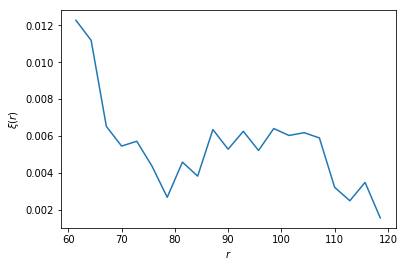

In [15]:
### plot binned xi:
plt.plot(rbin,Xi12)
plt.xlabel(r'$r$')
plt.ylabel(r'$\xi(r)$')
plt.show()

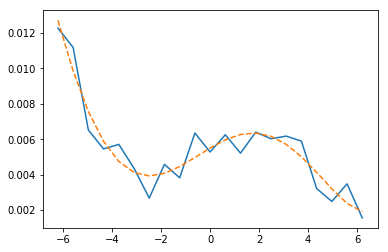

In [16]:
### check if a polynomial is an ok fit to it:
xbin = (rbin - mu)/scale
coef = np.polyfit(xbin, Xi12, nk)
p = np.poly1d(coef)
plt.plot(xbin,Xi12, xbin, p(xbin), '--')
plt.show()

In [17]:
### analyticRR:

### setting up the vector of RR:
umax = (rmax - mu)/scale
umin = (rmin - mu)/scale
vmax = (rmax - mu)/Lbox
vmin = (rmin - mu)/Lbox

V = np.zeros(2*nk + 2)
for k in range(0, len(V)):
    umaxk = umax**k
    umink = umin**k
    Va = (vmax**3 * umaxk - vmin**3 * umink) / (k+3)
    Vb = 2 * (mu/Lbox) * (vmax**2 * umaxk - vmin**2 * umink) / (k+2)
    Vc = (mu/Lbox)**2 * (vmax*umaxk - vmin*umink) / (k+1)
    V[k] = Va + Vb + Vc
nuRR = 4 * pi * V[0:nk] 

### the corresponding F_RR:
dim = (nk+1, nk+1)
FRR = np.zeros(dim)
for k in range(0,nk+1):
    for l in range(0,nk+1):
        FRR[k,l] = 4*pi*V[k+l]
        
        
### check if polynomial works in theory:
nuDD = fbasis
nuRR = np.zeros(nk+1)
theoryDiff = np.zeros(nk+1)
for k in range(0, nk+1):
    theoryDiff[k] = sum(FRR[k,:]*coef[:])

print(V)
print()
print(FRR[0,:])
print()
print(FRR[1,:])
print()
print(FRR[2,:])
print()
print(FRR[3,:])
print()
print(FRR[4,:])
print()
print(FRR[5,:])
print()

[  3.78662660e-04   5.29186947e-04   5.52195075e-03   1.35047709e-02
   1.42596959e-01   4.10285369e-01   4.36052083e+00   1.35727674e+01
   1.44847715e+02   4.72329507e+02   5.05503151e+03   1.69989171e+04]

[  4.75841532e-03   6.64995930e-03   6.93908796e-02   1.69705956e-01
   1.79192624e+00   5.15579800e+00]

[  6.64995930e-03   6.93908796e-02   1.69705956e-01   1.79192624e+00
   5.15579800e+00   5.47959208e+01]

[  6.93908796e-02   1.69705956e-01   1.79192624e+00   5.15579800e+00
   5.47959208e+01   1.70560425e+02]

[  1.69705956e-01   1.79192624e+00   5.15579800e+00   5.47959208e+01
   1.70560425e+02   1.82021007e+03]

[  1.79192624e+00   5.15579800e+00   5.47959208e+01   1.70560425e+02
   1.82021007e+03   5.93546763e+03]

[  5.15579800e+00   5.47959208e+01   1.70560425e+02   1.82021007e+03
   5.93546763e+03   6.35233994e+04]



In [18]:
### check that procedure returns the same ak:
invF = np.linalg.inv(FRR)
aTheory = np.dot(invF, theoryDiff)
print ('Theory:', aTheory) 

Theory: [  5.27796288e-07   3.72481557e-06  -6.43868092e-05  -9.67021623e-05
   8.27690923e-04   5.50084093e-03]


In [19]:
### do the same for simulation basis:
simDiff = nuDD - nuRR
aSim = np.dot(invF, simDiff)
print ('Sim:', aSim)
checkDiff = 0*simDiff
SaSim = sum(aSim[:])
for k in range(0,nk+1):
    checkDiff[k] = sum(FRR[k,:]*SaSim)

Sim: [  1.00555355e+00   8.17584472e-04  -1.09256171e-04  -6.23752416e-05
   4.07674356e-06   4.70688183e-07]


In [20]:
### show the polynomial fit:
rtable = np.arange(60,121)
xiSim = 0*rtable
xiFit = 0*rtable
xiTheory = 0*rtable
ytable = (rtable-mu)/scale
for k in range(0,nk+1):
    xiSim = xiSim + aSim[k] * ytable**k
    xiFit = xiFit + coef[k] * ytable**k

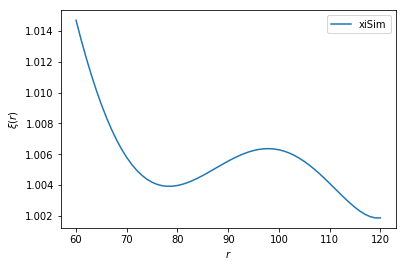

In [21]:
### plot xi:
plt.plot(rtable,xiSim)
#plt.plot(rtable,xiFit)
plt.xlabel(r'$r$')
plt.ylabel(r'$\xi(r)$')
plt.legend(["xiSim", "xiFit"])
plt.show()